**Previsão de Preços de Imóveis em Perdizes Utilizando Modelos de Regressão Supervisionada**

Gustavo Ibara (10389067)

Nicholas dos Santos Leal (10409210)

Patrick Alves Gonçalves (10409363)

Este notebook tem como objetivo aplicar técnicas de Inteligência Artificial na **previsão de preços de imóveis** na região de Perdizes.  

A proposta consiste em utilizar variáveis como **metragem, número de quartos, banheiros, vagas e valor do metro quadrado** para estimar o **valor aproximado do imóvel**.

As etapas principais serão:
- Entendimento e análise exploratória dos dados;
- Preparação da base (limpeza e pré-processamento);
- Treinamento de modelos de regressão supervisionada:
  - Regressão Linear;
  - Árvore de Decisão;
- Avaliação dos modelos usando métricas como:
  - MSE (Mean Squared Error),
  - RMSE (Root Mean Squared Error),
  - MAE (Mean Absolute Error),
  - MAPE (Mean Absolute Percentage Error),
  - R² (Coeficiente de determinação);
- Comparação dos resultados e discussão das conclusões.

Os dados utilizados são provenientes de uma base privada, previamente tratada e anonimizados quando necessário.

In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Pré-processamento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Carregando a base de dados
caminho_arquivo = "Base_Perdizes.xlsx"
df = pd.read_excel(caminho_arquivo)

# Visualizando as 5 primeiras linhas
df.head()


,Valor aproximado do imóvel,Metro quadrado,Quartos,Banheiros,Metragem,Vagas
0,443520,17740.800000,1,1,25,0
1,443520,17740.800000,1,1,25,0
2,430416,17216.640000,1,1,25,0
3,379008,22294.588235,1,1,17,0
4,442512,17700.480000,1,1,25,0


In [4]:
# Dimensão da base
print("Formato do dataset (linhas, colunas):", df.shape)

# Informações gerais
print("\nInformações gerais:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe().T


Formato do dataset (linhas, colunas): (188, 6)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Valor aproximado do imóvel  188 non-null    int64  
 1   Metro quadrado              188 non-null    float64
 2   Quartos                     188 non-null    int64  
 3   Banheiros                   188 non-null    int64  
 4   Metragem                    188 non-null    int64  
 5   Vagas                       188 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 8.9 KB

Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
Valor aproximado do imóvel,188.0,702070.324468,303782.479191,290000.0,453600.000000,634900.000000,854000.000000,2.350000e+06
Metro quadrado,188.0,16684.110912,5796.199764,5800.0,12539.090263,16542.726126,19757.804348,4.791667e+04
Quartos,188.0,1.500000,0.641689,1.0,1.000000,1.000000,2.000000,4.000000e+00
Banheiros,188.0,1.526596,0.748857,1.0,1.000000,1.000000,2.000000,6.000000e+00
Metragem,188.0,46.803191,21.903986,17.0,25.000000,48.500000,67.000000,8.000000e+01
Vagas,188.0,0.861702,0.782168,0.0,0.000000,1.000000,1.000000,3.000000e+00


## Análise Exploratória dos Dados (EDA)

Nesta seção, vamos:
- Verificar a distribuição das variáveis numéricas;
- Observar possíveis outliers;
- Analisar a correlação entre as variáveis;
- Visualizar a relação entre o **valor aproximado do imóvel** e as demais variáveis explicativas.


In [5]:
# Verificando valores ausentes
df.isna().sum()

,0
Valor aproximado do imóvel,0
Metro quadrado,0
Quartos,0
Banheiros,0
Metragem,0
Vagas,0


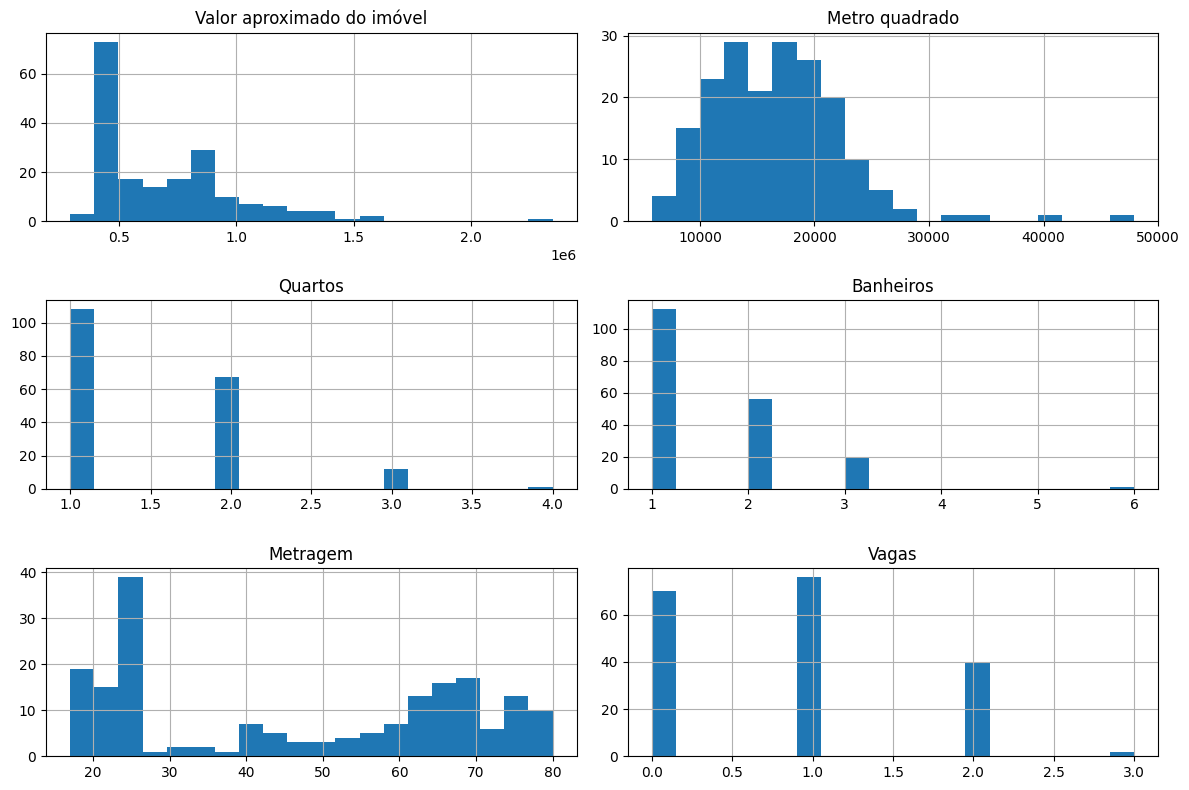

In [6]:
# Histograma das variáveis numéricas
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


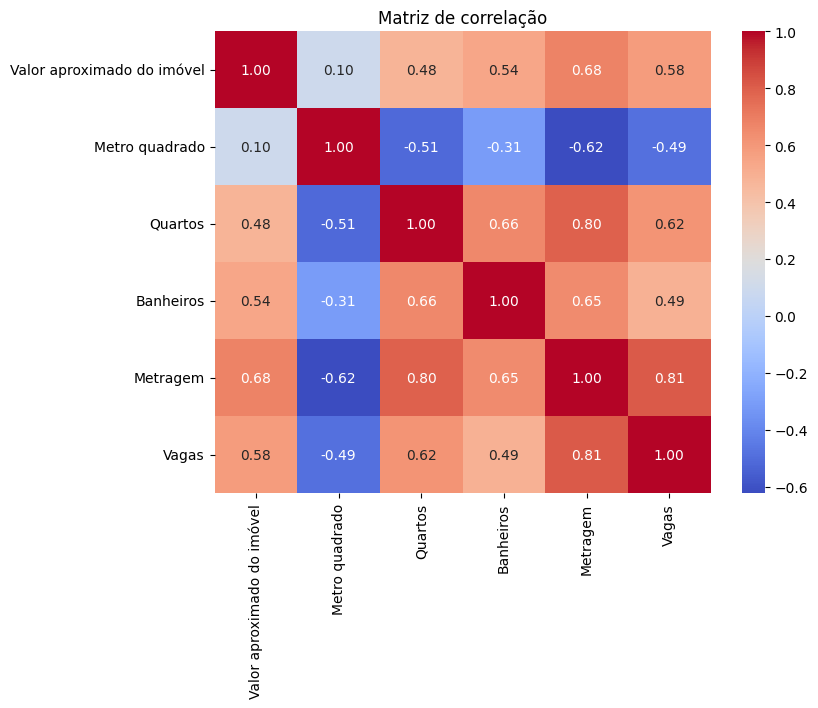

In [8]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlação")
plt.show()


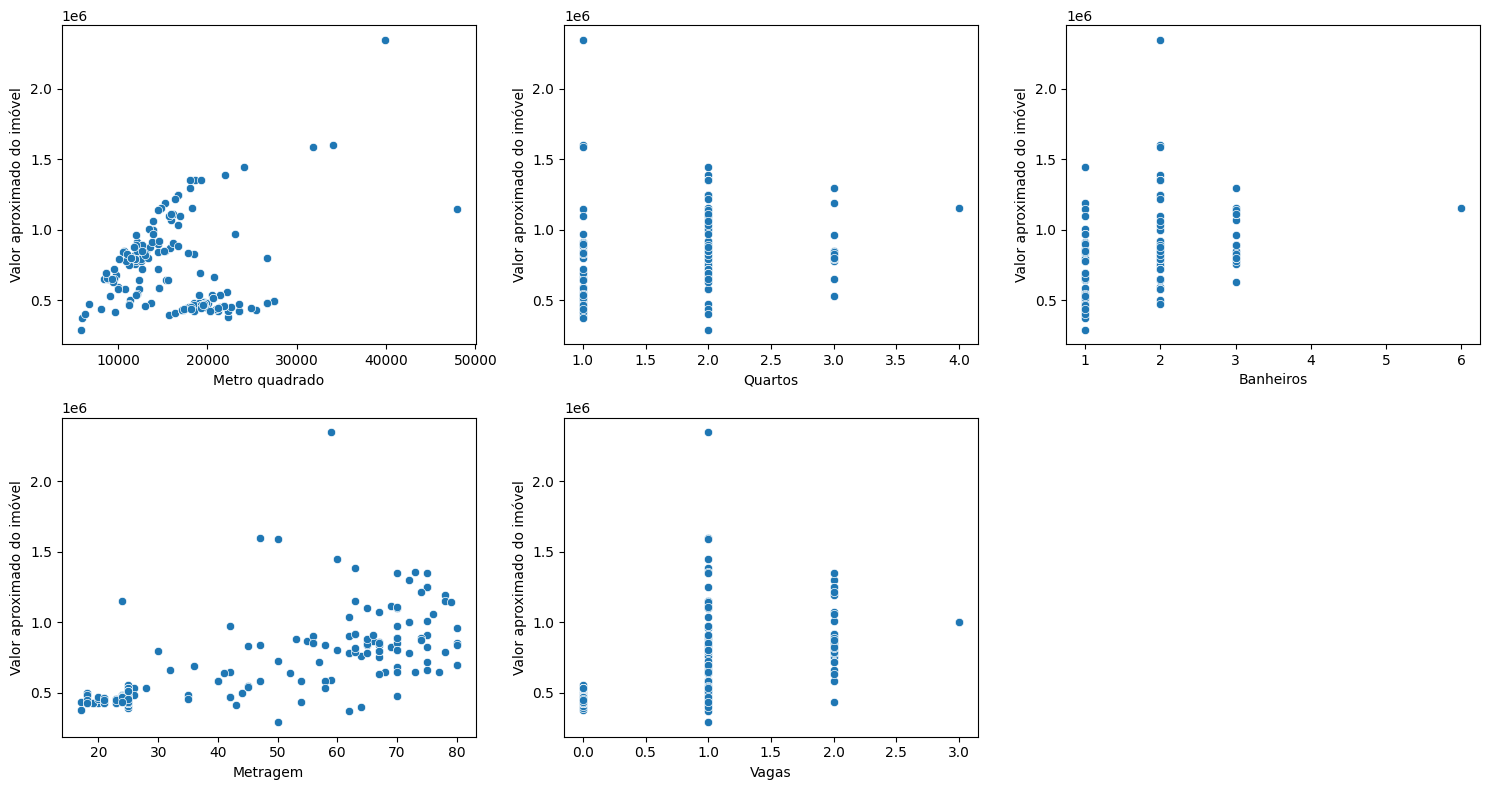

In [9]:
col_alvo = "Valor aproximado do imóvel"
features = ["Metro quadrado", "Quartos", "Banheiros", "Metragem", "Vagas"]

plt.figure(figsize=(15, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df[col_alvo])
    plt.xlabel(col)
    plt.ylabel(col_alvo)

plt.tight_layout()
plt.show()


## Preparação dos Dados (Pré-processamento)

Nesta etapa, vamos:
- Dividir os dados em conjuntos de **treino** e **teste**;


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para teste
    random_state=42     # reproduzibilidade
)

X_train.shape, X_test.shape


((150, 5), (38, 5))

## Modelagem: Regressão Supervisionada

Nesta seção vamos treinar e avaliar dois modelos:

1. **Regressão Linear**  
2. **Árvore de Decisão (DecisionTreeRegressor)**  

Vamos utilizar as seguintes métricas de avaliação:

- **MSE** (Mean Squared Error)  
- **RMSE** (Root Mean Squared Error)  
- **MAE** (Mean Absolute Error)  
- **MAPE** (Mean Absolute Percentage Error)  
- **R²** (coeficiente de determinação)  


In [12]:
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    r2 = r2_score(y_true, y_pred)

    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R2": r2
    }


In [13]:
# Pipeline para Regressão Linear com padronização
pipeline_lr = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

# Treinamento
pipeline_lr.fit(X_train, y_train)

# Predições
y_train_pred_lr = pipeline_lr.predict(X_train)
y_test_pred_lr  = pipeline_lr.predict(X_test)

# Métricas
metricas_lr_train = calcular_metricas(y_train, y_train_pred_lr)
metricas_lr_test  = calcular_metricas(y_test, y_test_pred_lr)

print("Métricas - Regressão Linear (Treino):")
for k, v in metricas_lr_train.items():
    print(f"{k}: {v:.4f}")

print("\nMétricas - Regressão Linear (Teste):")
for k, v in metricas_lr_test.items():
    print(f"{k}: {v:.4f}")


Métricas - Regressão Linear (Treino):
MSE: 8447243481.4310
RMSE: 91908.8868
MAE: 64172.3345
MAPE (%): 9.9056
R2: 0.9136

Métricas - Regressão Linear (Teste):
MSE: 7526565579.1569
RMSE: 86755.7812
MAE: 68964.2654
MAPE (%): 11.5865
R2: 0.8835


In [17]:
# Modelo de Árvore de Decisão
model_dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,           # limite da profundidade
    min_samples_leaf=5
)

# Treinamento
model_dt.fit(X_train, y_train)

# Predições
y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt  = model_dt.predict(X_test)

# Métricas
metricas_dt_train = calcular_metricas(y_train, y_train_pred_dt)
metricas_dt_test  = calcular_metricas(y_test, y_test_pred_dt)

print("Métricas - Árvore de Decisão (Treino):")
for k, v in metricas_dt_train.items():
    print(f"{k}: {v:.4f}")

print("\nMétricas - Árvore de Decisão (Teste):")
for k, v in metricas_dt_test.items():
    print(f"{k}: {v:.4f}")


Métricas - Árvore de Decisão (Treino):
MSE: 11505436321.2455
RMSE: 107263.3969
MAE: 57091.2896
MAPE (%): 7.3467
R2: 0.8824

Métricas - Árvore de Decisão (Teste):
MSE: 4934057564.8607
RMSE: 70242.8471
MAE: 46727.1416
MAPE (%): 6.5642
R2: 0.9236


In [18]:
# Organizando métricas em um DataFrame para comparar
comparacao = pd.DataFrame({
    "Regressão Linear - Treino": metricas_lr_train,
    "Regressão Linear - Teste": metricas_lr_test,
    "Árvore Decisão - Treino": metricas_dt_train,
    "Árvore Decisão - Teste": metricas_dt_test
})

comparacao


,Regressão Linear - Treino,Regressão Linear - Teste,Árvore Decisão - Treino,Árvore Decisão - Teste
MSE,8.447243e+09,7.526566e+09,1.150544e+10,4.934058e+09
RMSE,9.190889e+04,8.675578e+04,1.072634e+05,7.024285e+04
MAE,6.417233e+04,6.896427e+04,5.709129e+04,4.672714e+04
MAPE (%),9.905554e+00,1.158651e+01,7.346725e+00,6.564182e+00
R2,9.136317e-01,8.834780e-01,8.823634e-01,9.236137e-01


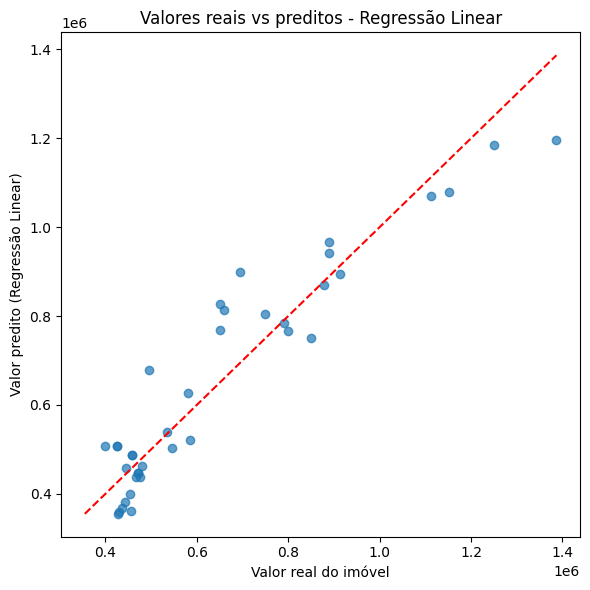

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.7)
plt.xlabel("Valor real do imóvel")
plt.ylabel("Valor predito (Regressão Linear)")
plt.title("Valores reais vs preditos - Regressão Linear")
# Linha de referência (y = x)
limites = [min(y_test.min(), y_test_pred_lr.min()),
           max(y_test.max(), y_test_pred_lr.max())]
plt.plot(limites, limites, "r--")
plt.tight_layout()
plt.show()


In [31]:
def prever_preco_linear(metro_quadrado, quartos, banheiros, metragem, vagas):
    dados = pd.DataFrame({
        "Metro quadrado": [metro_quadrado],
        "Quartos": [quartos],
        "Banheiros": [banheiros],
        "Metragem": [metragem],
        "Vagas": [vagas]
    })

    preco_previsto = pipeline_lr.predict(dados)[0]
    return preco_previsto

# Exemplo:
prever_preco_linear(12000, 2, 2, 80, 1)


np.float64(1065934.7911804412)

In [30]:
def prever_preco_arvore(metro_quadrado, quartos, banheiros, metragem, vagas):
    dados = pd.DataFrame({
        "Metro quadrado": [metro_quadrado],
        "Quartos": [quartos],
        "Banheiros": [banheiros],
        "Metragem": [metragem],
        "Vagas": [vagas]
    })

    preco_previsto = model_dt.predict(dados)[0]
    return preco_previsto

# Exemplo:
prever_preco_arvore(12000, 2, 2, 80, 1)


np.float64(837591.8518518518)

In [33]:
def prever_imovel_interativo_duplo():
    print("Digite as características do imóvel:\n")

    metragem = float(input("Metragem total (m²): "))
    quartos = int(input("Quantidade de quartos: "))
    banheiros = int(input("Quantidade de banheiros: "))
    vagas = int(input("Quantidade de vagas: "))

    # Usamos o valor médio do metro quadrado da base
    metro_medio = df["Metro quadrado"].mean()

    dados = pd.DataFrame({
        "Metro quadrado": [metro_medio],
        "Quartos": [quartos],
        "Banheiros": [banheiros],
        "Metragem": [metragem],
        "Vagas": [vagas]
    })

    # Previsões
    preco_linear = pipeline_lr.predict(dados)[0]
    preco_arvore = model_dt.predict(dados)[0]

    print("\n===== PREVISÃO DE PREÇOS =====")
    print(f"📌 Regressão Linear:        R$ {preco_linear:,.2f}")
    print(f"📌 Árvore de Decisão:       R$ {preco_arvore:,.2f}")
    print("\n(Usando o valor médio do metro quadrado da região como referência.)")


# Para chamar a função:
prever_imovel_interativo_duplo()


Digite as características do imóvel:

Metragem total (m²): 100
Quantidade de quartos: 2
Quantidade de banheiros: 2
Quantidade de vagas: 1

===== PREVISÃO DE PREÇOS =====
📌 Regressão Linear:        R$ 1,626,648.55
📌 Árvore de Decisão:       R$ 1,104,920.93

(Usando o valor médio do metro quadrado da região como referência.)


## Conclusão

Neste trabalho, utilizamos técnicas de **regressão supervisionada** para prever o **valor aproximado de imóveis** na região de Perdizes, a partir de variáveis como metragem, número de quartos, banheiros, vagas e valor do metro quadrado.

Foram treinados dois modelos principais:
- **Regressão Linear**, com padronização das variáveis;
- **Árvore de Decisão**, sem necessidade de padronização.

Comparamos os modelos por meio de métricas como **MSE, RMSE, MAE, MAPE e R²** nos conjuntos de treino e teste.  
A partir dos resultados, é possível identificar:

- Qual modelo apresenta melhor desempenho no conjunto de teste;
- Se há sinais de **overfitting** (por exemplo, desempenho muito melhor em treino do que em teste, especialmente na Árvore de Decisão);
- O quão boa é a capacidade de explicação do modelo (via R²) e quão confiáveis são as previsões em termos percentuais (via MAPE).

O estudo mostra, na prática, como a **Inteligência Artificial** pode contribuir para maior eficiência no mercado imobiliário, fornecendo estimativas de preço mais consistentes, transparentes e de fácil interpretação.
